# Python Practice Lecture 7 MATH 342W Queens College
## Author: Amir ElTabakh
## Date: February 22, 2022

## Agenda:
* Build a simple linear regression model
* Assessing quality of simple linear regression
* Building a linear regression model with the Boston Housing Dataset

## Simple Linear Regression (p = 1)

To understand what the algorithm is doing - best linear fit by minimizing the squared errors, we can draw a picture. First let's make up some very simple training data $\mathbb{D}$. 

Our x vector data will be realized from the uniform[0, 1] random variable. Let's import the `numpy.random` library to help with that. This module is not to be confused with the `random.random` module we used in an earlier demo.

Use the `help()` function if you want to read the documentation.

We'll be plotting with `matplotlib`, let's import our dependencies in the following cell.

In [1]:
# importing dependencies
import matplotlib.pyplot as plt

# importing dependencies
import numpy as np

In [2]:
# defining n
n = 20

In [3]:
# check out documentation for numpy.random module
#help(np.random)

In [5]:
# defining x_vec
x = np.random.uniform(0, 1, n)
x

array([0.57702392, 0.50727898, 0.20650792, 0.08077213, 0.15145927,
       0.97565723, 0.05341777, 0.31641193, 0.86270491, 0.44037687,
       0.91617437, 0.82335831, 0.0318946 , 0.69334817, 0.55249464,
       0.87820445, 0.70371136, 0.33205493, 0.38949588, 0.58660695])

In [6]:
# We'll set beta_0 and beta_1
beta_0 = 3
beta_1 = -2

In [7]:
# set function h_star
h_star = beta_0 + beta_1 * x
h_star

array([1.84595216, 1.98544205, 2.58698416, 2.83845574, 2.69708145,
       1.04868554, 2.89316446, 2.36717615, 1.27459017, 2.11924625,
       1.16765126, 1.35328338, 2.9362108 , 1.61330366, 1.89501073,
       1.24359111, 1.59257727, 2.33589015, 2.22100824, 1.8267861 ])

In [9]:
# defining epsilons
epsilons = np.random.normal(0, 0.33, n)
epsilons

array([ 0.09663391,  0.80164857, -0.03905213, -0.28422254,  0.20843699,
       -0.1967225 , -0.1814192 ,  0.16945391,  0.45452704, -0.12839   ,
        0.10138772, -0.77331581,  0.32454003,  0.0042096 , -0.1660151 ,
        0.39668317, -0.27337164,  0.07126646,  0.1038609 , -0.64293275])

In [10]:
# setting y feature
y = h_star + epsilons
y

array([1.94258608, 2.78709062, 2.54793204, 2.5542332 , 2.90551844,
       0.85196304, 2.71174527, 2.53663006, 1.72911721, 1.99085625,
       1.26903897, 0.57996756, 3.26075083, 1.61751326, 1.72899563,
       1.64027428, 1.31920563, 2.4071566 , 2.32486913, 1.18385336])

Fantastic. We have our descriptive `x`, our response `y` which is riddled with epsilons, the best model given the data we have $h_*$ h_star, and the true weights $\beta_{0, 1}$.

Let's plot the data.

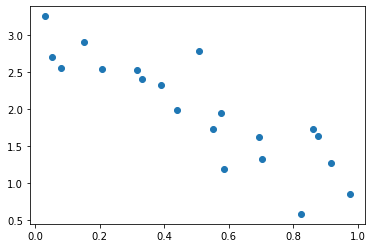

In [11]:
# plotting data
plt.scatter(x, y)

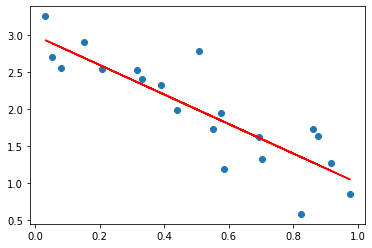

In [12]:
# lets plot the true h_star
plt.plot(x, h_star, 'red')
plt.scatter(x, y)

Now let's calculate the simple least squares coefficients.

`np.corrcoef()` returns the correlation matrix, which is a two-dimensional array with the correlation coefficients. The values on the main diagonal of the correlation matrix (upper left and lower right) are equal to 1. The upper left value corresponds to the correlation coefficient for x and x, while the lower right value is the correlation coefficient for y and y. They are always equal to 1.

However, what you usually need are the lower left and upper right values of the correlation matrix. These values are equal and both represent the Pearson correlation coefficient for x and y. 

In [13]:
# correlation between x and y
r = np.corrcoef(x, y)
r

array([[ 1.        , -0.86837152],
       [-0.86837152,  1.        ]])

In [14]:
r = np.corrcoef(x, y)[0, 1]
r

-0.8683715209158214

In [15]:
# std dev of x
s_x = np.std(x)
s_x

0.29605928745877813

In [16]:
# std dev of y
s_y = np.std(y)
s_y

0.7115437306119198

In [17]:
# mean of x
xbar = np.mean(x)
xbar

0.5039477293934281

In [18]:
# mean of y
ybar = np.mean(y)
ybar

1.9944648732821566

In [19]:
# setting b_1
b_1 = r * s_y / s_x
b_1

-2.087028976031098

In [20]:
# setting b_0
b_0 = ybar - b_1 * xbar
b_0

3.0462183869313195

```
beta_0 = 3
beta_1 = -2
```
Note how $b_0$ and $b_1$ are not exactly the same as $\beta_0$ and $\beta_1$. Why?

In [21]:
# Shockingly there is no plt function to plot via slope and intercept.
# We create our own

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

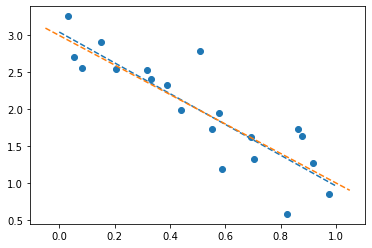

In [22]:
# plotting y = b_0 + b_1 * x
abline(b_1, b_0)

# plotting y = b_0 + b_1 * x
abline(beta_1, beta_0)

# plotting observed data points
plt.scatter(x, y)

## Assessing Quality of a Simple Linear Regression

Note: our $\mathcal{A}$ was ordinary least squares. What follows below is a method of assessing model fit quality not only for the least squares line, or any linear fit, but any regression fit.

In [23]:
# Importing Pandas
import pandas as pd

In [24]:
simple_df = pd.DataFrame({'1': [1 for i in range(n)],
                          'x': x,
                          'y': y,
                          'gs': b_0 + b_1 * x,
                          'e': y - (b_0 + b_1 * x),
                          'e_0': y - ybar})

simple_df

,1,x,y,gs,e,e_0
0,1,0.577024,1.942586,1.841953,0.100633,-0.051879
1,1,0.507279,2.787091,1.987512,0.799578,0.792626
2,1,0.206508,2.547932,2.615230,-0.067298,0.553467
3,1,0.080772,2.554233,2.877645,-0.323411,0.559768
4,1,0.151459,2.905518,2.730118,0.175400,0.911054
5,1,0.975657,0.851963,1.009993,-0.158030,-1.142502
6,1,0.053418,2.711745,2.934734,-0.222989,0.717280
7,1,0.316412,2.536630,2.385858,0.150773,0.542165
8,1,0.862705,1.729117,1.245728,0.483389,-0.265348
9,1,0.440377,1.990856,2.127139,-0.136283,-0.003609


In [25]:
# SSE
sse = sum(simple_df['e']**2)
sse

2.4902691622803452

In [26]:
# MSE
mse = sse / (n - 2)
mse

0.1383482867933525

In [27]:
# RMSE
rmse = np.sqrt(mse)
rmse

0.3719519952807788

In [28]:
# variance of y
s_sq_y = np.var(y)
s_sq_y

0.5062944805731282

In [29]:
# variance of e
s_sq_e = np.var(simple_df['e'])
s_sq_e

0.12451345811401729

In [30]:
# R^2
rsq = (s_sq_y - s_sq_e) / s_sq_y
rsq

0.7540690983376566

In [31]:
#calculated in a different, but equivalent way
sse_0 = (n - 1) * s_sq_y
print((sse_0 - sse) / sse_0)

# Inconsistency: (n - 0) returns equivalent value
sse_0 = (n - 0) * s_sq_y
print((sse_0 - sse) / sse_0)

0.7411253666712174
0.7540690983376566


Note residuals always have sample average = 0 (modulo numeric error):

In [32]:
print(np.mean(simple_df['e_0']))
print(np.mean(simple_df['e']))

-7.771561172376095e-17
-1.2212453270876723e-16


We will prove this fact later in class.

Let's take a look at predictions by truth. We'll be using the Seaborn library, it is a popular library for statistical data visualization.

Seaborn has excellent [documentation](https://seaborn.pydata.org/introduction.html).

I think we'll stick to Seaborn for the rest of the semester.

In [33]:
# install seaborn
!pip install seaborn

In [34]:
# importing dependencies
import seaborn as sns

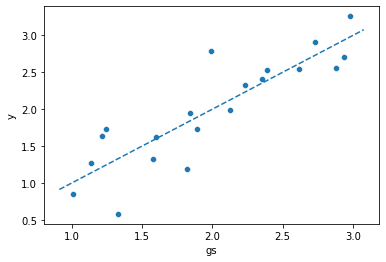

In [35]:
sns.scatterplot(data=simple_df, x="gs", y="y")

# plotting y = x
abline(1, 0)

Linear regression is pretty popular so there's obviously support for this in R and Python. We'll import the `LinearRegression` module from sklearn.

In [36]:
# importing dependencies
from sklearn.linear_model import LinearRegression

In [37]:
# initializing model object
model = LinearRegression(fit_intercept=True) # We will want to fit an intercept

In [38]:
# fitting data
model.fit( simple_df[['x']], simple_df[['y']])

LinearRegression()

In [39]:
# Lets look at the documentation for the model object
#help(model)

In [40]:
# output model coeffitent
model.coef_

array([[-2.08702898]])

In [41]:
# output model intercept
model.intercept_

array([3.04621839])

In [42]:
# printing b_1
print(b_1)

# printing b_0
print(b_0)

-2.087028976031098
3.0462183869313195


## Building a linear regression model with the Boston Housing Dataset

Let's load the *in*famous Boston Housing dataset.

In [43]:
# Import sklearn's datasets module
from sklearn import datasets

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Boston Housing dataset as bh
bh = datasets.load_boston()

In [44]:
# Import Pandas
import pandas as pd

# Create Boston Housing df
df = pd.DataFrame(data = bh.data, columns = bh.feature_names)

# Load the first 5 rows of df
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
# Defining x
x = df['RM']
x

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [46]:
# Define response variable
y = pd.Series(bh.target) # medv variable
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [47]:
r = np.corrcoef(x, y)[0, 1]
r

0.695359947071539

In [48]:
# std dev of x
s_x = np.std(x)
s_x

0.7019225143345692

In [49]:
# std dev of y
s_y = np.std(y)
s_y

9.188011545278206

In [50]:
# mean of x
xbar = np.mean(x)
xbar

6.284634387351787

In [51]:
# mean of y
ybar = np.mean(y)
ybar

22.532806324110698

In [52]:
# setting b_1
b_1 = r * s_y / s_x
b_1

9.102108981180303

In [53]:
# setting b_0
b_0 = ybar - b_1 * xbar
b_0

-34.67062077643857

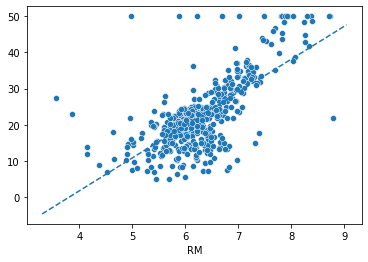

In [54]:
# Lets plot the line on the data
sns.scatterplot(x=x, y=y)

# plotting y = b_0 + b_1 * x
abline(b_1, b_0)

So how well did we do? Let's calculate some performance metrics.

In [55]:
# defining predictions
yhat = b_0 + b_1 * x #this is the g(x^*) function!
yhat

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Name: RM, Length: 506, dtype: float64

In [56]:
# Defining errors
e = y - yhat
e

0     -1.175746
1     -2.174021
2      3.971968
3      4.374062
4      5.817848
         ...   
501   -2.939584
502   -0.434286
503   -4.925691
504   -5.169108
505   -8.315096
Length: 506, dtype: float64

In [57]:
# SSE
sse = sum(e**2)
sse

22061.879196211794

In [58]:
# MSE
mse = sse / len(y)
mse

43.600551771169556

In [59]:
# RMSE
rmse = np.sqrt(mse)
rmse

6.603071389222561

In [60]:
# variance of y
s_sq_y = np.var(y)

# variance of e
s_sq_e = np.var(e)

# R^2
rsq = (s_sq_y - s_sq_e) / s_sq_y
rsq

0.4835254559913343

SSE is not a super useful number alone. MSE is not super useful alone. RMSE is... what does it mean? What does $R^2$ mean?